## LE TRUNG KIEN - Lead Scoring Case Study - Data Science Program (Global) C12

## Part I. Preparation

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
# Remove unecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
leads_data = pd.read_csv('Leads.csv')

#### Data inspection

In [4]:
# Inspect the dataset
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads_data.shape

(9240, 37)

In [6]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Check for null values
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Check for possible duplicates
sum(leads_data.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
# Check unique values
leads_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Note:
- There are 9240 rows and 37 columns in the dataset;
- A number of columns contain null values;
- Some columns contain the "Select" value, which is as good as null because it means the customer did not select any option from the provided list;
- There is no duplicate values.

## Part II. Data Cleaning & Manipulation

### 2.1. Dealing with null values

#### First we will convert those "Select" values into NaN, so that we can inspect null values

In [10]:
# convert "Select" into NaN
leads_data = leads_data.replace("Select", np.nan)

In [11]:
# Inspect null values
# leads_data.isnull().sum()

In [12]:
# Now we will see how many percentage do the null values account for in each column
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### We will now remove columns with more than 45% of missing values

In [13]:
mv_drop = ["How did you hear about X Education", "Lead Profile", "Lead Quality", "Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Activity Index", "Asymmetrique Profile Index"]

leads_data.drop(mv_drop, axis = 1, inplace = True)

In [14]:
# Check the shape after dropping the above columns
leads_data.shape

(9240, 30)

In [15]:
# round(100*(leads_data.isnull().sum()/len(leads_data.index)),2).sort_values(ascending = False)

#### Next, we will remove 1 unique data value columns as they are not helpful for any in depth analysis.

In [16]:
leads_data.nunique().sort_values(ascending = True)

Receive More Updates About Our Courses              1
I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Search                                              2
A free copy of Mastering The Interview              2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
X Education Forums                                  2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
Newspaper Article                                   2
What matters most to you in choosing a course       3
Lead Origin                                         5
What is your current occupation                     6
City                        

In [17]:
uv_drop = ["Receive More Updates About Our Courses", "I agree to pay the amount through cheque", "Magazine", "Get updates on DM Content", "Update me on Supply Chain Content"]

leads_data.drop(uv_drop, axis = 1, inplace = True)

In [18]:
# Check the shape after dropping the above columns
leads_data.shape

(9240, 25)

#### We will also drop Lead Number and Prospect ID since they have all unique values

In [19]:
leads_data.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [20]:
# Check the shape after dropping the above columns
leads_data.shape

(9240, 23)

Last Notable Activity and Last Activity reveals somewhat similar information, with the latter being more useful in providing insights (Last Notable Activity are performed by students, they also contains misleading information such as "modified"). Therefore, we will drop Last Notable Activity.

In [21]:
leads_data.drop(["Last Notable Activity"], axis = 1, inplace = True)

In [22]:
# Check the shape after dropping the above columns
leads_data.shape

(9240, 22)

### 2.2. Categorical Columns

In [23]:
# First we will take a look at categorical columns
categorical_columns = leads_data.select_dtypes(include=['object']).columns

In [24]:
# Look at the missing values of these columns
mv_categorical = round(100*leads_data[categorical_columns].isnull().mean(),2)
print(mv_categorical.sort_values(ascending = False))

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Newspaper                                         0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Search                                            0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
A free copy of Mastering The Interview            0.00
dtype: flo

#### Next, we will deal with the remaining columns with missing values for Categorical Data

##### 'City' column

In [25]:
# We deal with City first
round(100*(leads_data["City"].value_counts()/len(leads_data["City"])),2)

Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

#### Note:
- In the City column, nearly 40% of data values are missing, while ~35% of the remaining 60% are Mumbai. If we impute the missing values with Mumbai, the data becomes skewed. Besides Mumbai, other options look like a region or a group of locations. Meanwhile, since X Education primarily sells their courses online, the location of the learners should not play a significant role in analysis. Hence, we dicide to drop this column.

In [26]:
# Drop City column
leads_data.drop(["City"], axis = 1, inplace = True)

In [27]:
# Check the shape after dropping the above columns
leads_data.shape

(9240, 21)

##### 'Specialization' column

In [28]:
# Now we look at Specialization
round(100*(leads_data['Specialization'].value_counts()/len(leads_data['Specialization'])),2)

Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

#### Note:
- The Specialization column lets us know the industry domain in which the customer worked before. This may be helpful in identify the industry in which X Education can focus recruitment campaigns on. Therefore, even though this column contains more than one third of missing values, we have decided not to drop it for now. We will create a new category "Others" to fill nulls.

In [29]:
# Create a new category "Others" to fill null values
leads_data['Specialization'] = leads_data['Specialization'].fillna('Others')

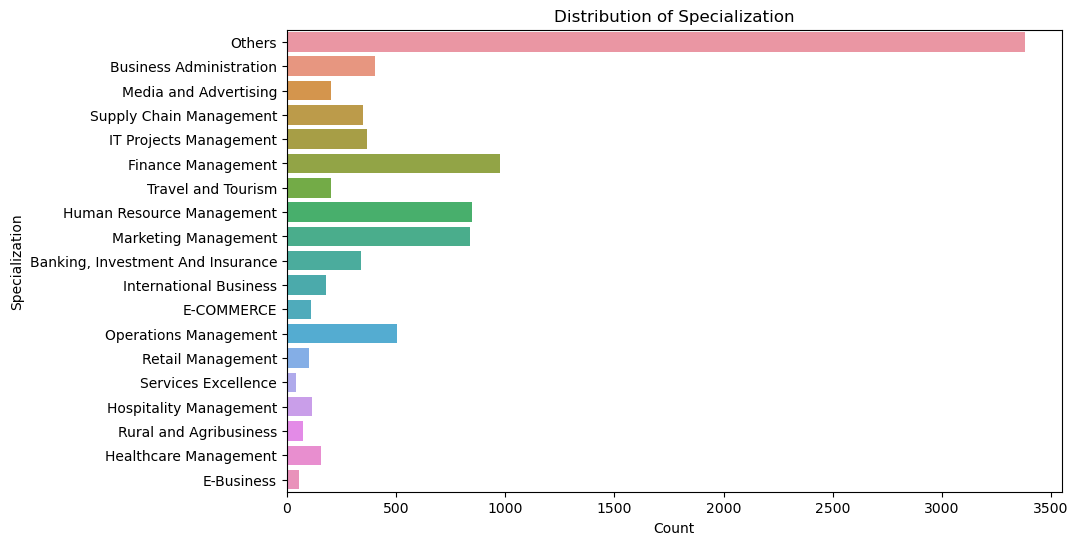

In [30]:
# Take a look at the Specialization plot after we've filled missing values:
plt.figure(figsize=(10,6))
sns.countplot(y='Specialization', data=leads_data)
plt.title('Distribution of Specialization')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.show()

##### Tags column

In [31]:
# Look at Tags column
round(100*(leads_data['Tags'].value_counts()/len(leads_data['Tags'])),2)

Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.29
in touch with EINS                                    0.

#### Note:
- The tags column reflects the current status of the lead on whether / how they will respond to the offers. With its usefulness in modelling being vague while containing >36% of missing values, we will drop this column.

In [32]:
# Drop Tags column
leads_data.drop(["Tags"], axis = 1, inplace = True)

In [33]:
# Check the shape after dropping the above columns
leads_data.shape

(9240, 20)

##### 'What matters most to you in chossing a course' column

In [34]:
# Look at What matters most column
round(100*(leads_data["What matters most to you in choosing a course"].value_counts()/len(leads_data["What matters most to you in choosing a course"])),2)

Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

#### Note:
- Nearly all received responses are "Better Career Prospects". Hence this massively skewed data column will not contribute to modelling and can be dropped.

In [35]:
# Drop the column
leads_data.drop(["What matters most to you in choosing a course"], axis = 1, inplace = True)

In [36]:
# Check the shape after dropping the above columns
leads_data.shape

(9240, 19)

##### 'What is your current occupation' column

In [37]:
# Look at Current occupation column
round(100*(leads_data["What is your current occupation"].value_counts()/len(leads_data["What is your current occupation"])),2)

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

#### Note:
- The majority of respondents are unemployed. This column may provide useful insights.
- The column contains ~29% of missing values. It is reasonable that we impute these missing values with "Unemployed".

In [38]:
# Imputing missing values with Unemployed
leads_data["What is your current occupation"] = leads_data["What is your current occupation"].fillna("Unemployed")

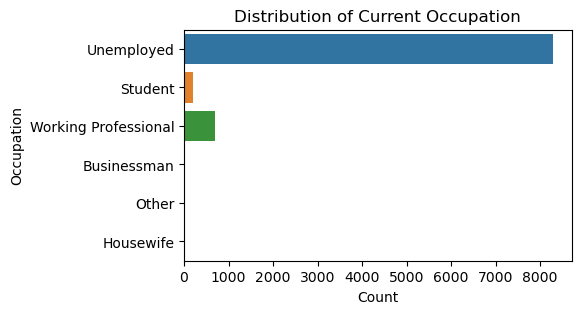

In [39]:
# Take a look at the Current Occupation plot after we've filled missing values:
plt.figure(figsize=(5,3))
sns.countplot(y="What is your current occupation", data=leads_data)
plt.title("Distribution of Current Occupation")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()

##### 'Country' column

In [40]:
# Look at Country column
round(100*(leads_data["Country"].value_counts()/len(leads_data["Country"])),2)

India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
China                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
Netherlands              0.02
Ghana                    0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

#### Note:
- Although this could provide some useful information, the data is skewed since the vast majority of X Education's students come from India. Therefore, we will also drop this column

In [41]:
# Drop the Country column
leads_data.drop(["Country"], axis = 1, inplace = True)

In [42]:
# Check the shape after dropping the above columns
leads_data.shape

(9240, 18)

##### 'Last Activity' column

In [43]:
# Look at Last Activity column
round(100*(leads_data["Last Activity"].value_counts()/len(leads_data["Last Activity"])),2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

#### Note:
- This column only contains 1.11% of missing values, with the "Email Opened" being the most frequently selected answer. Hence, we will impute missing values with "Email Opened"

In [44]:
# Imputing missing values with Email Opened
leads_data["Last Activity"] = leads_data["Last Activity"].fillna("Email Opened")

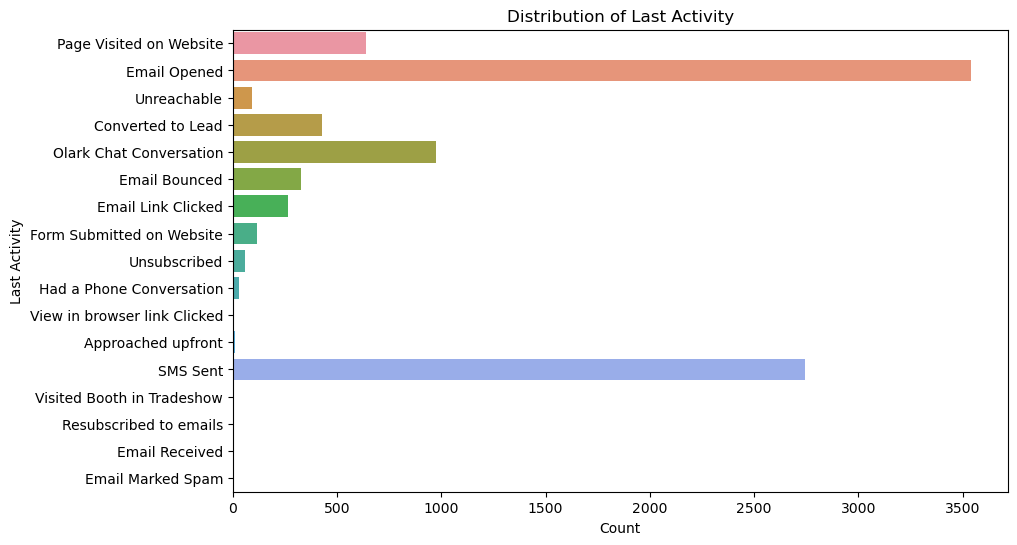

In [45]:
# Take a look at the Last Activity plot after we've filled missing values:
plt.figure(figsize=(10,6))
sns.countplot(y="Last Activity", data=leads_data)
plt.title("Distribution of Last Activity")
plt.xlabel("Count")
plt.ylabel("Last Activity")
plt.show()

##### 'Lead Source' column

In [46]:
# Look at Lead Source column
round(100*(leads_data["Lead Source"].value_counts()/len(leads_data["Lead Source"])),2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

#### Note:
- Most leads come from Google. Only 0.39% of respondents did not select an answer in this column. Therefore, we will impute missing values with "Google"

In [47]:
# Imputing missing values with Google
leads_data["Lead Source"] = leads_data["Lead Source"].fillna("Google")

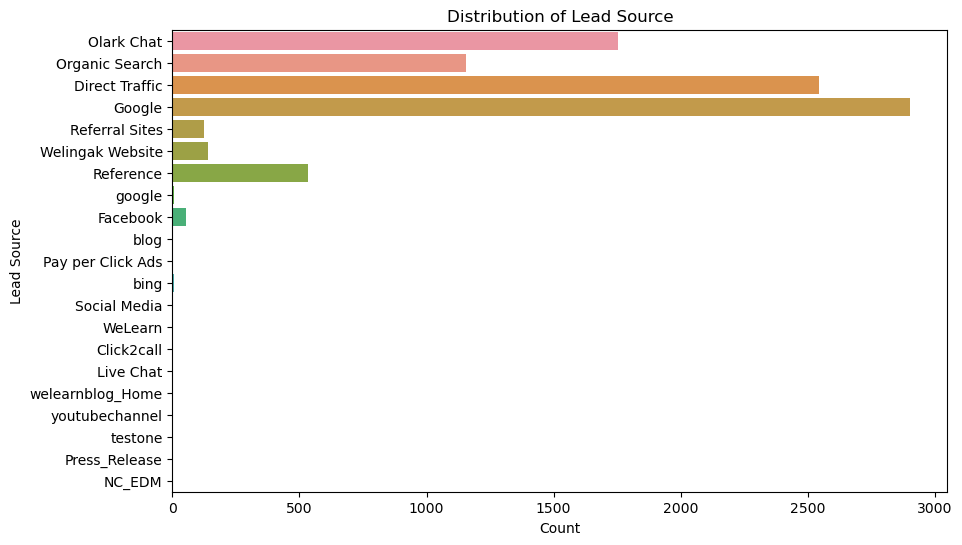

In [48]:
# Take a look at the Lead Source plot after we've filled missing values:
plt.figure(figsize=(10,6))
sns.countplot(y="Lead Source", data=leads_data)
plt.title("Distribution of Lead Source")
plt.xlabel("Count")
plt.ylabel("Lead Source")
plt.show()

In [49]:
# Look at the missing values of categorical columns again
categorical_columns = leads_data.select_dtypes(include=["object"]).columns
mv_categorical = round(100*leads_data[categorical_columns].isnull().mean(),2)
print(mv_categorical.sort_values(ascending = False))

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
dtype: float64


#### Note:
- Categorical columns have now been cleaned and no longer contain missing values

### 2.3. Numerical Columns

In [50]:
# First we will take a look at numerical columns
numerical_columns = leads_data.select_dtypes(include=['int64', 'float64']).columns

In [51]:
# Look at the missing values of these columns
mv_numerical = round(100*leads_data[numerical_columns].isnull().mean(),2)
print(mv_numerical.sort_values(ascending = False))

TotalVisits                    1.48
Page Views Per Visit           1.48
Converted                      0.00
Total Time Spent on Website    0.00
dtype: float64


##### 'TotalVisits' column

In [52]:
# Take a look at TotalVisits values:
leads_data.TotalVisits.value_counts().head(10)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

#### Note:
- TotalVisits only contains 1.48% of missing values. We will impute missing values with mode.

In [53]:
# Impute missing values with mode for TotalVisits
leads_data["TotalVisits"].fillna(leads_data["TotalVisits"].mode()[0], inplace=True)

In [54]:
# Take a look at TotalVisits after missing values filled:
leads_data.TotalVisits.value_counts().head(10)

0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

##### 'Page Views Per Visit' column

In [55]:
# Take a look at Page Views Per Visit values:
leads_data["Page Views Per Visit"].value_counts().head(10)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

#### Note:
- Similar to TotalVisits, Page Views Per Visitonly contains 1.48% of missing values. We will impute missing values with mode.

In [56]:
# Impute missing values with mode for Page Views Per Visit
leads_data["Page Views Per Visit"].fillna(leads_data["Page Views Per Visit"].mode()[0], inplace=True)

In [57]:
# Take a look at Page Views Per Visit after missing values filled:
leads_data["Page Views Per Visit"].value_counts().head(10)

0.0    2326
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

#### Now we will double check all columns after we have handled missing values for both categorical and numerical columns

In [58]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2).sort_values(ascending = False)

Lead Origin                               0.0
Lead Source                               0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [59]:
# leads_data.nunique().sort_values(ascending = True)

#### Note:
- The dataset no longer contains missing values

### 2.4. Handling skewed columns

In [60]:
# Check for skewness of categorical columns
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(leads_data[col].value_counts(normalize=True) * 100)


Column: Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Column: Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

Column: Do Not Email
No     92.056277
Yes     7.94372

#### Note:
- From categorical columns, we will drop Do Not Email, Do Not Call, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, and Through Recommendations.

In [61]:
others_drop = ["Do Not Email", "Do Not Call", "Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations"]

leads_data.drop(others_drop, axis = 1, inplace = True)

In [62]:
# Inspect the dataset after dropping all unwanted columns
leads_data.shape

(9240, 10)

In [63]:
leads_data.head(10)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No
5,API,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,Others,Unemployed,No
6,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,No
7,API,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,Others,Unemployed,No
8,Landing Page Submission,Direct Traffic,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Yes
9,API,Google,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,No


### 2.5. Outliers
We will now check for outliers in the remaining numerical columns

In [64]:
leads_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


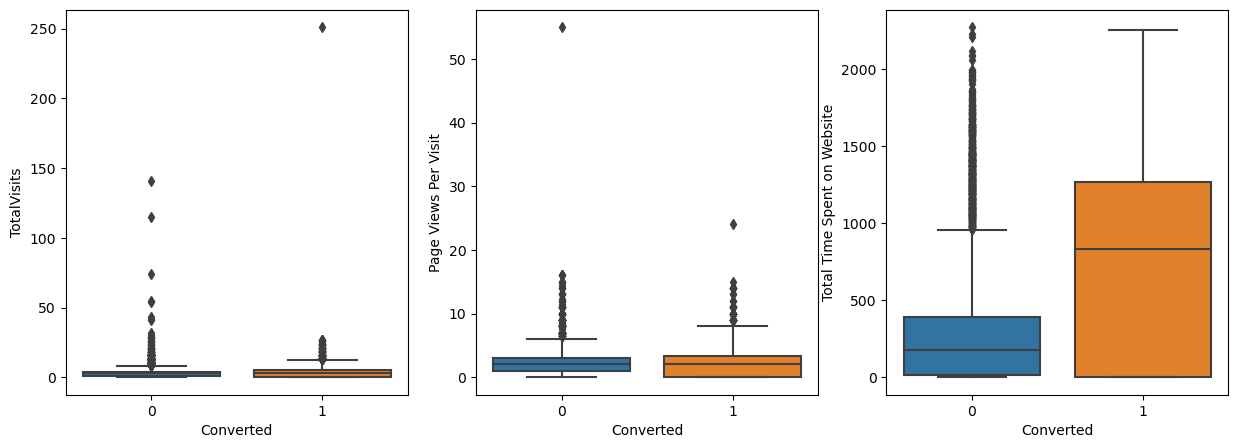

In [65]:
# Boxplot with Converted as hue
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data)
plt.show()

#### Note:
- We notice that TotalVisits and Page Views Per Visit contain outliers. So we will have to treat these variables.

In [66]:
leads_data.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [67]:
# Defining function to treat outliers by capping and flooring
def outlier_treat(df,columns):
    for i in columns:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # Capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # Flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [68]:
cols = ["TotalVisits","Page Views Per Visit"]

outlier_treat(leads_data,cols)

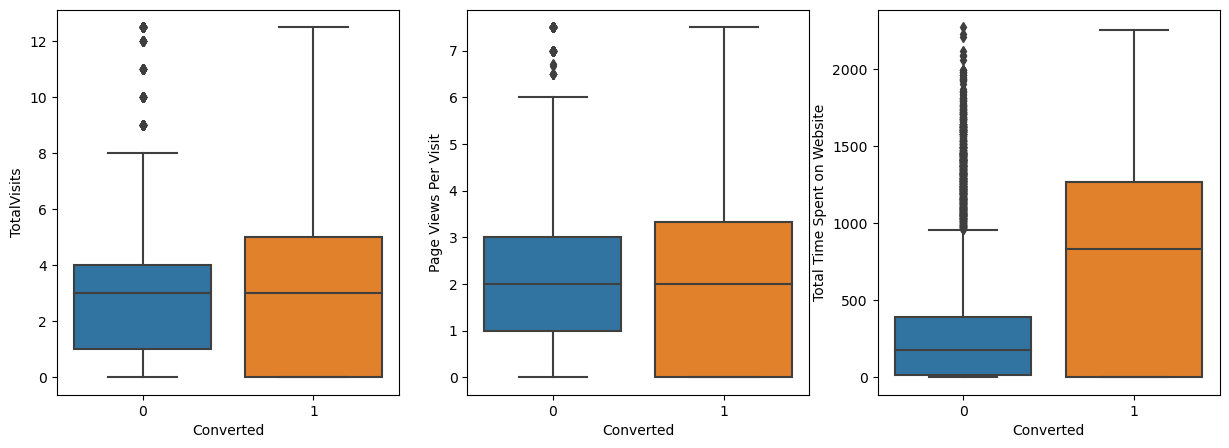

In [69]:
# Boxplot with Converted as hue
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data)
plt.show()

### 2.6. Data standardization

In [70]:
# We take a look at the remaining columns
for col in leads_data.columns:
    print(f"\nColumn: {col}")
    print(leads_data[col].value_counts())


Column: Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Column: Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Column: Converted
0    5679
1    3561
Name: Converted, dtype: int64

Column: TotalVisits
0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0    

#### Note:
- In Lead Source and Last Activity column, there are values with very low occurrence rate. We will group these values into "Others";
- We will standardise the lower-case 'google' in Lead Source;
- We will rename lengthy column names;
- We will map "Yes", "No" in binary categorical column (A free copy of Mastering The Interview) with 1 and 0.

##### Lead Source column

In [71]:
# Grouping low frequency values to Others
leads_data['Lead Source'] = leads_data['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

In [72]:
# Replacing 'google' with 'Google'
leads_data['Lead Source'] = leads_data['Lead Source'].replace("google","Google")

In [73]:
leads_data["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

##### Renaming lengthy column names

In [74]:
# Renaming column name "A free copy of Mastering The Interview" to "Free Copy"
leads_data.rename(columns={'A free copy of Mastering The Interview': 'Free Copy'}, inplace=True)

# Renaming column name "What is your current occupation" to "Current Occupation"
leads_data.rename(columns={'What is your current occupation': 'Current Occupation'}, inplace=True)

# Renaming column name "Total Time Spent on Website" to "Web Time"
leads_data.rename(columns={'Total Time Spent on Website': 'Web Time'}, inplace=True)

# Renaming column name "Page Views Per Visit" to "Page Views"
leads_data.rename(columns={'Page Views Per Visit': 'Page Views'}, inplace=True)

In [75]:
#leads_data.head(10)

##### Mapping binary categorical column (A free copy of Mastering The Interview)

In [76]:
# Mapping Yes / No values to 1 / 0
leads_data['Free Copy'] = leads_data['Free Copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [77]:
leads_data.head(10)

,Lead Origin,Lead Source,Converted,TotalVisits,Web Time,Page Views,Last Activity,Specialization,Current Occupation,Free Copy
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0
5,API,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,Others,Unemployed,0
6,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,0
7,API,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,Others,Unemployed,0
8,Landing Page Submission,Direct Traffic,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,1
9,API,Google,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,0


In [78]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lead Origin         9240 non-null   object 
 1   Lead Source         9240 non-null   object 
 2   Converted           9240 non-null   int64  
 3   TotalVisits         9240 non-null   float64
 4   Web Time            9240 non-null   int64  
 5   Page Views          9240 non-null   float64
 6   Last Activity       9240 non-null   object 
 7   Specialization      9240 non-null   object 
 8   Current Occupation  9240 non-null   object 
 9   Free Copy           9240 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


### The dataset now should be ready for analysis with 10 data columns left.

## Part III. Exploratory Data Analysis

Before performing univariate and bivariate analysis, we will take a look at the conversion rate on our handled dataset

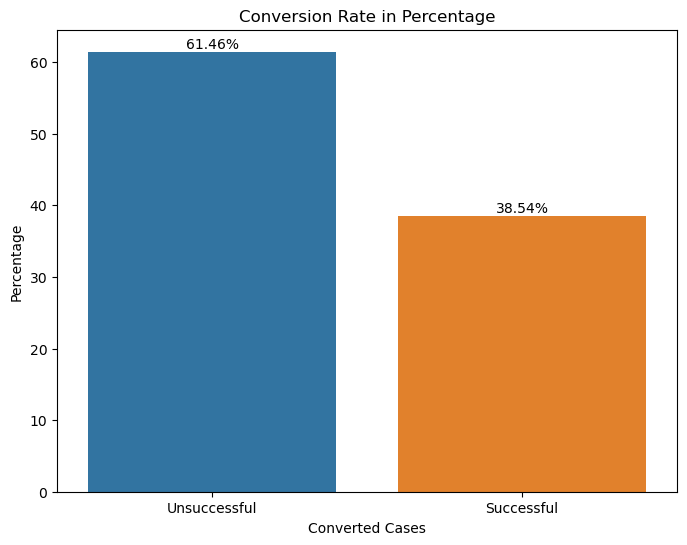

In [79]:
# Calculate the conversion rate in percentage
conversion_rate = round(leads_data["Converted"].value_counts(normalize=True) * 100, 2)

# Create a bar plot for the conversion rate
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=conversion_rate.index, y=conversion_rate.values)

for i in range(len(conversion_rate)):
    barplot.text(i, conversion_rate.values[i], f'{round(conversion_rate.values[i], 2)}%', ha='center', va='bottom')

plt.title("Conversion Rate in Percentage")
plt.xlabel("Converted Cases")
plt.ylabel("Percentage")
plt.xticks([0,1],["Unsuccessful","Successful"])
plt.show()

### Insights:
- We can see that only 38.54% of the leads were succesfully converted. Now the aim is to help improving this rate.

### 3.1. Univariate Analysis

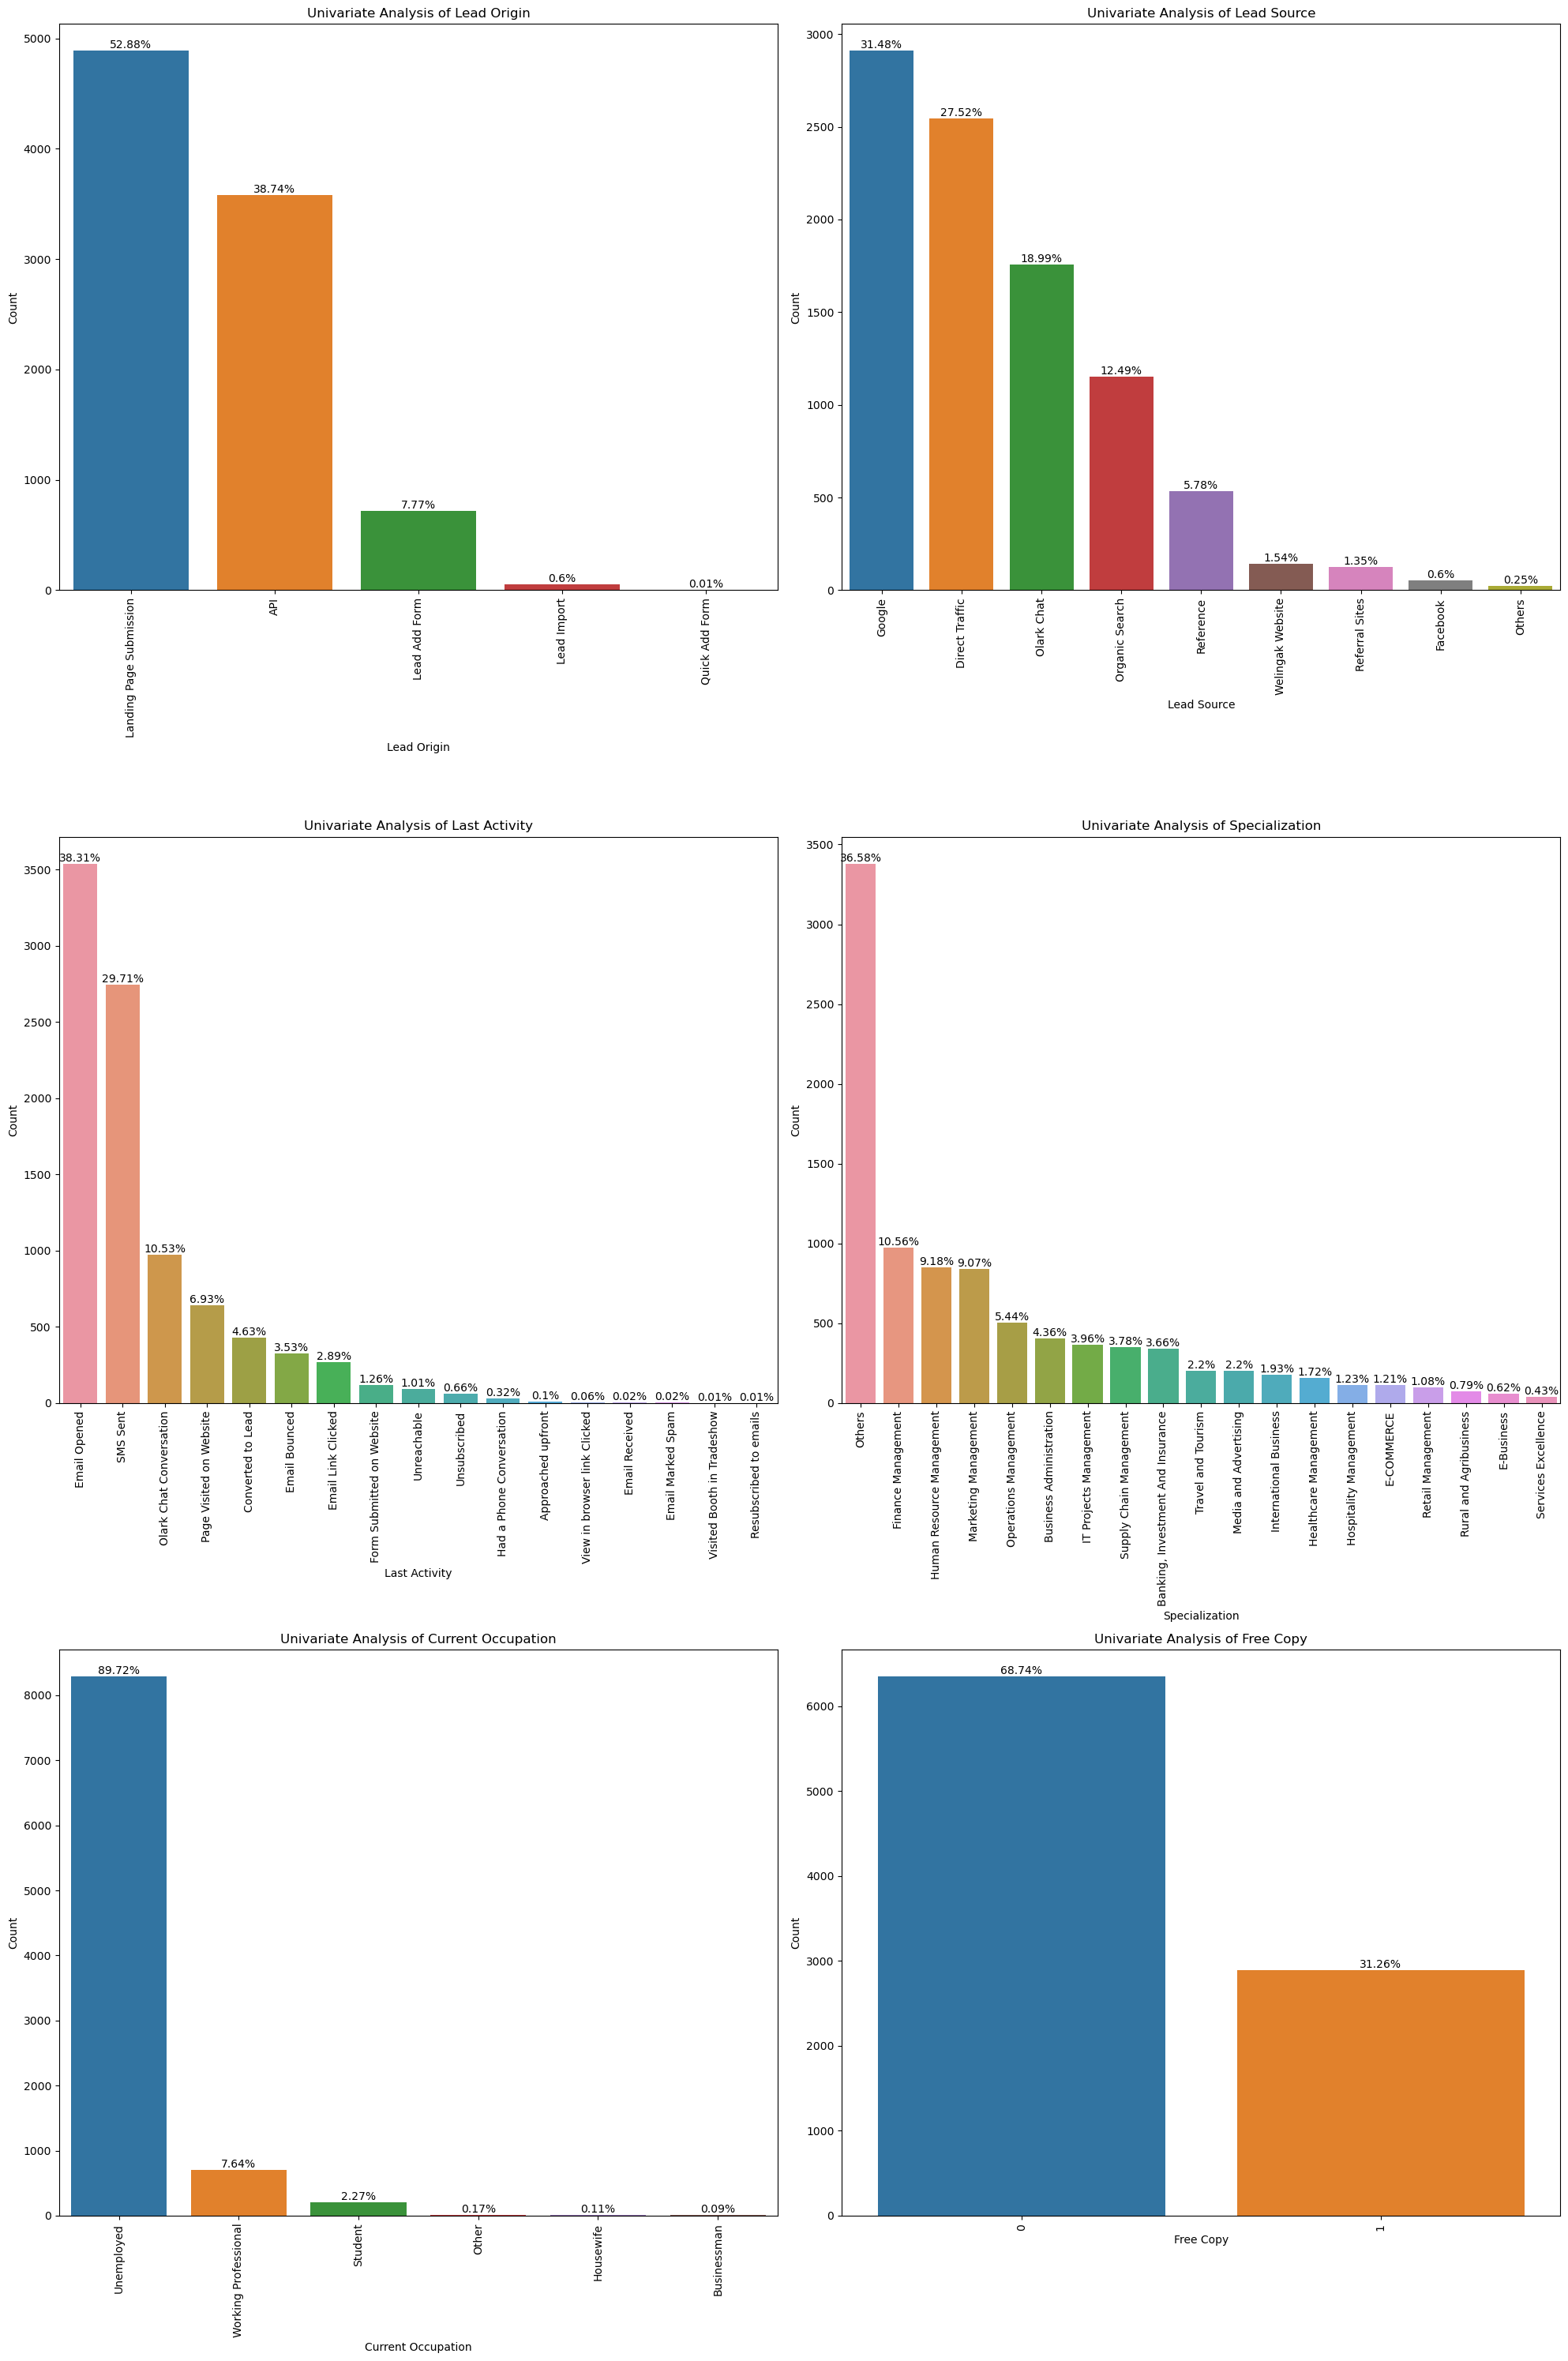

In [80]:
# List of categorical columns to analyze
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current Occupation', 'Free Copy']

# Create a grid of subplots (4 rows and 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(20, 30))

# Perform univariate analysis for each categorical column
for i, col in enumerate(categorical_columns):
    category_counts = leads_data[col].value_counts()
    category_percentages = category_counts / len(leads_data) * 100
    
    # Create a bar plot for the category counts in the subplots
    barplot = sns.barplot(x=category_counts.index, y=category_counts.values, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Univariate Analysis of {col}')
    axs[i//2, i%2].set_xlabel(col)
    axs[i//2, i%2].set_ylabel("Count")
    axs[i//2, i%2].tick_params(axis='x', rotation=90) 
    
    for j in range(len(category_counts)):
        barplot.text(j, category_counts.values[j], f'{round(category_percentages.values[j], 2)}%', ha='center', va='bottom')

# Display
plt.tight_layout()
plt.show()

### Insights:
- The majority of leads come from "Landing Page Submission" (52.88%) and "API" (38.74%).
- Nearly 90% of leads are unemployed.
- Of the known specilization, people who worked in Finance Management, HRM, and Marketing Management have a higher tendency to be attracted by the courses provided by X Education.
- Leads seem to be more keen on opening emails and sending sms.

### 3.2. Bivariate Analysis

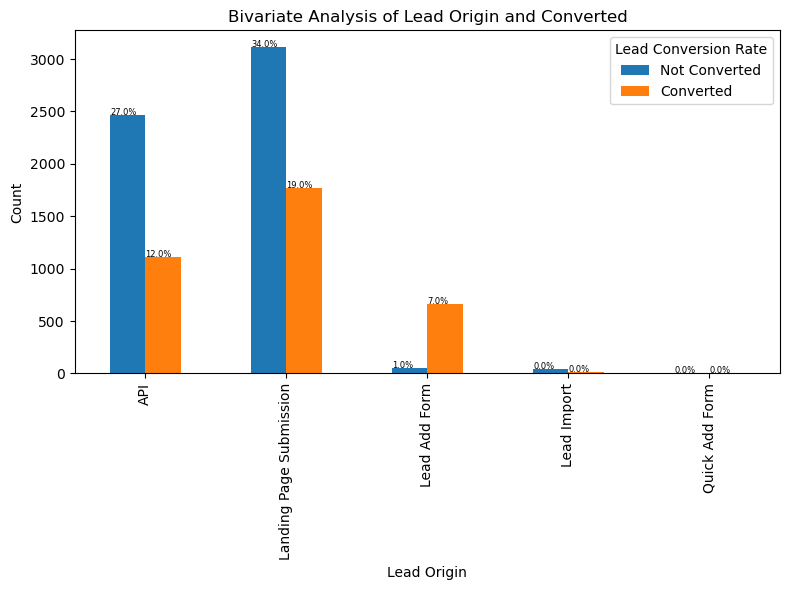

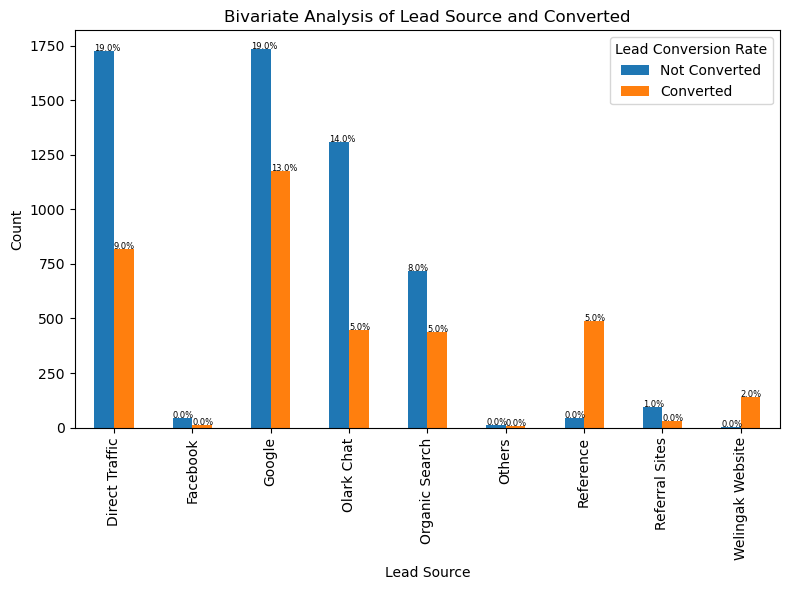

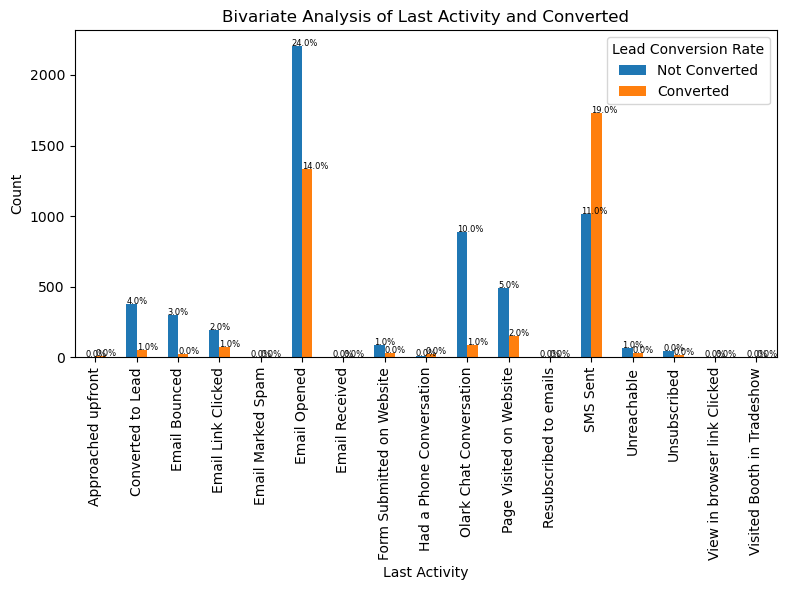

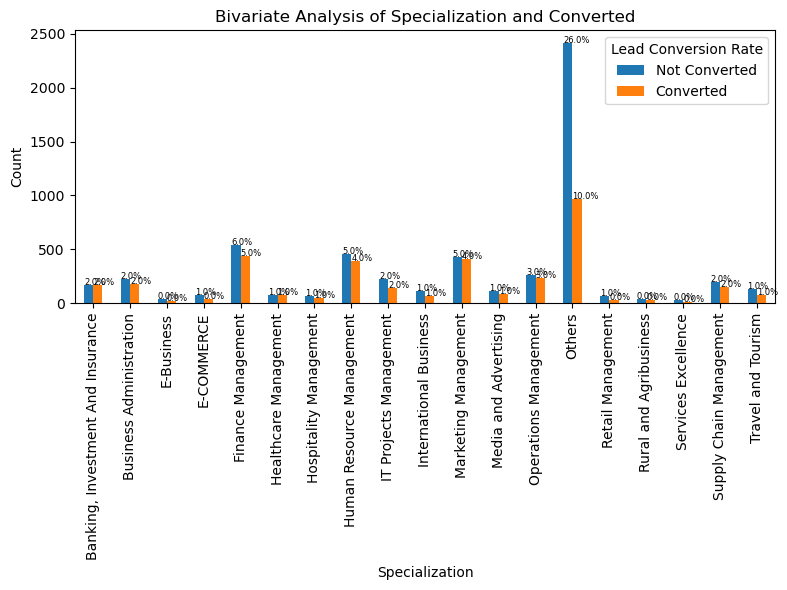

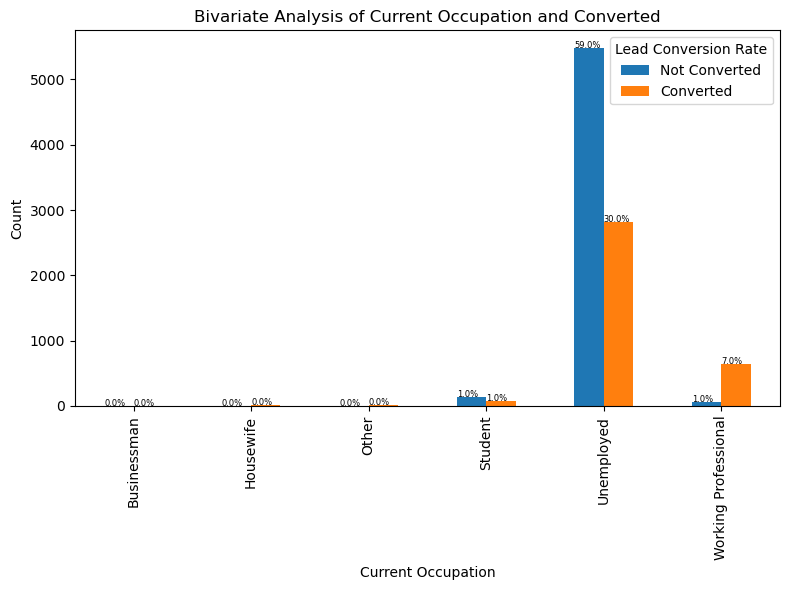

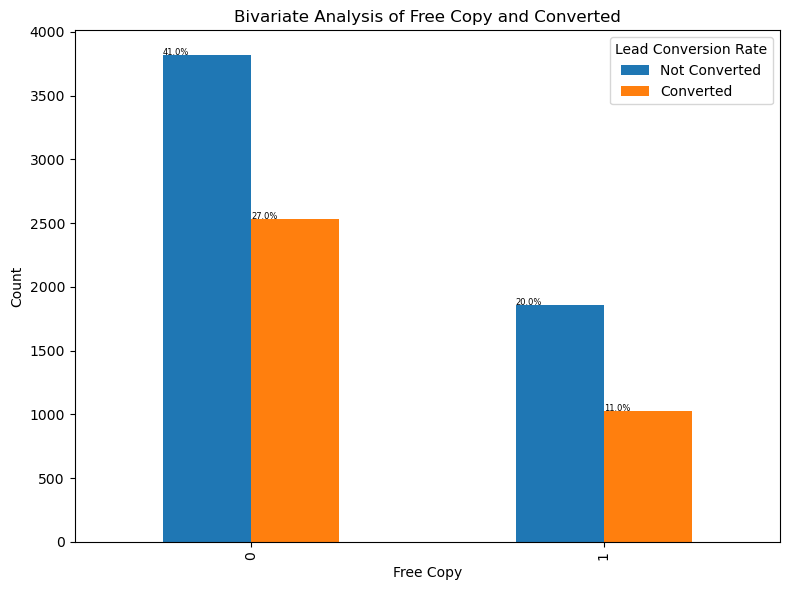

In [81]:
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current Occupation', 'Free Copy']

# Perform bivariate analysis for each categorical column
for col in categorical_columns:
    cross_tab = pd.crosstab(leads_data[col], leads_data['Converted'])
    
    # Create a new figure for each column
    fig, ax = plt.subplots(figsize=(8, 6))
    
    bars = cross_tab.plot(kind='bar', stacked=False, ax=ax)
    
    for bar in bars.patches:
        yval = bar.get_height()
        ax.text(bar.get_x(), yval, f'{round(yval*100/len(leads_data), 0)}%', fontsize=6)
        
    ax.set_title(f'Bivariate Analysis of {col} and Converted')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")

    # Show the plot
    plt.tight_layout()
    plt.show()

### Insights:
- **Lead Origin**: Landing Page Submission accounts for about 53% of the leads, while that of API and Lead Add Form are 29% and 8% respectively. The Conversion rates of Landing Page Submission, API, and Lead Add Form are, therefore, 31%, 36%, and 88% accordingly.
- **Lead Source**: Of all the sources, leads that come from Reference and Welingak Website are mostly sucessfully converted. Yet these two only account for 5% and 2% of all lead count. Google tops the contribution, generating 32% of leads. Direct Traffic, Olark Chat, and Organic Search follow with 28%, 19%, and 13% of lead count. Google is the better source among these 4 as it has a conversion rate of 41%.
- **Last Activity**: Approximately 63% of potential customers who sent an SMS become an X student, the highest conversion rate based on Last Activity. Top lead contributors are groups who opened email (38%), sent SMS (30%), or participated in olark chat (11%). Olark Chat seems to be ineffective since only 9% of clients were converted.
- **Specialization**: Of the known categories, Finance Management (11%), HRM (9%), and Marketing Management (9.9%) are more significant compared to other groups. These groups' conversion rate are fairly high (>44%) with Marketing Management almost reached 50% of conversion.
- **Current Occupation**: Although the majority of leads come from people who do not have a job, only 34% of them participated in X's courses. Working Professionals account for just 8% of leads but this group's conversion rate is remarkably high (88%).
- **Free Copy**: Distributing a free copy of Mastering The Interview does not seem to improve conversion rate as only 35% of the people who received Mastering the Interview are converted comparing with 40% for those who did not.

#### Numerical Variables

In [82]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lead Origin         9240 non-null   object 
 1   Lead Source         9240 non-null   object 
 2   Converted           9240 non-null   int64  
 3   TotalVisits         9240 non-null   float64
 4   Web Time            9240 non-null   int64  
 5   Page Views          9240 non-null   float64
 6   Last Activity       9240 non-null   object 
 7   Specialization      9240 non-null   object 
 8   Current Occupation  9240 non-null   object 
 9   Free Copy           9240 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


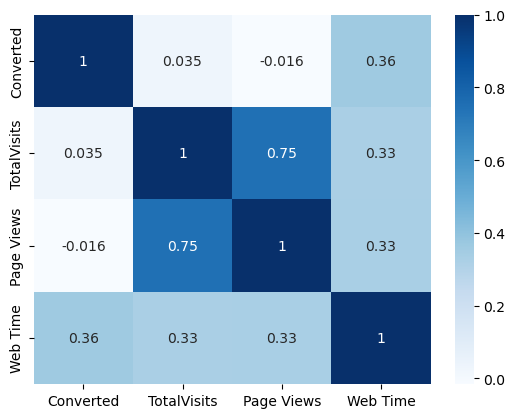

In [83]:
# List numerical columns to analyze
num_cols = ['Converted', 'TotalVisits', 'Page Views', 'Web Time']

# Draw heatmap to show correlation between numerical variables
sns.heatmap(data = leads_data[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

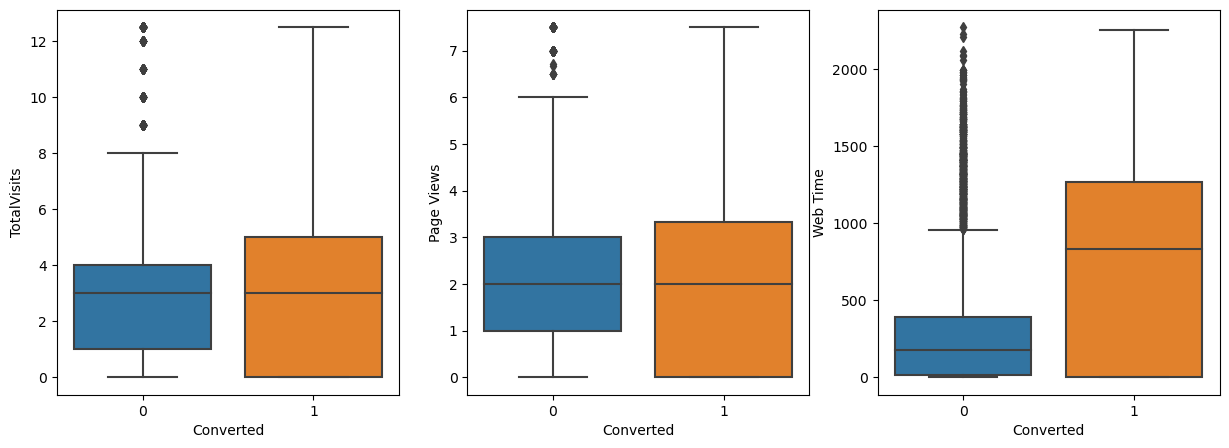

In [84]:
# Draw boxplot to observe
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views', x = 'Converted', data = leads_data)
plt.subplot(1,3,3)
sns.boxplot(y = 'Web Time', x = 'Converted', data = leads_data)
plt.show()

### Insights:
- It seems that leads who spent more time on the website have a higher tendency to be converted.

## Part IV. Data Preparation for Model Building

### 5.1. Create dummy variables

In [85]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lead Origin         9240 non-null   object 
 1   Lead Source         9240 non-null   object 
 2   Converted           9240 non-null   int64  
 3   TotalVisits         9240 non-null   float64
 4   Web Time            9240 non-null   int64  
 5   Page Views          9240 non-null   float64
 6   Last Activity       9240 non-null   object 
 7   Specialization      9240 non-null   object 
 8   Current Occupation  9240 non-null   object 
 9   Free Copy           9240 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


In [86]:
leads_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Web Time,Page Views,Last Activity,Specialization,Current Occupation,Free Copy
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [87]:
# Create dummy variables for categorical variables
leads_dummy = pd.get_dummies(leads_data[["Lead Origin","Lead Source","Last Activity","Specialization", "Current Occupation"]], drop_first=True)
#leads_dummy.info()

In [88]:
# Concatinate dummies to the main dataset
leads_data = pd.concat([leads_data, leads_dummy], axis=1)

In [89]:
leads_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Web Time,Page Views,Last Activity,Specialization,Current Occupation,Free Copy,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
leads_data.shape

(9240, 61)

In [91]:
# We will now drop variables that have dummies created
leads_data = leads_data.drop(["Lead Origin","Lead Source","Last Activity","Specialization", "Current Occupation"], axis = 1)

In [92]:
leads_data.shape

(9240, 56)

### 5.2. Test-Train Split

In [93]:
# Putting target variables to X
X = leads_data.drop("Converted", axis=1)

# Putting target variables to y
y = leads_data["Converted"]

In [94]:
# Split the data into Train - Test with 70:30 ratio
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 100)

In [95]:
X_train.shape

(6468, 55)

In [96]:
y_train.shape

(6468,)

In [97]:
X_test.shape

(2772, 55)

In [98]:
y_test.shape

(2772,)

### 5.3. Scaling numerical data

In [99]:
scaler = MinMaxScaler()
num_vars = X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [100]:
X_train.head()

,TotalVisits,Web Time,Page Views,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
1871,0.00,0.000000,0.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0.32,0.214349,0.177333,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,0.40,0.046655,0.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0.40,0.541373,0.666667,0.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3934,0.00,0.000000,0.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [101]:
X_train.describe()

,TotalVisits,Web Time,Page Views,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.256747,0.212974,0.301820,0.311843,0.528139,0.079468,0.005102,0.000155,0.005102,0.320810,...,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.001237,0.021027,0.897805,0.077613
std,0.241102,0.240566,0.254744,0.463282,0.499246,0.270489,0.071252,0.012434,0.071252,0.466824,...,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.035150,0.143484,0.302929,0.267582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.005282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.240000,0.108275,0.266667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.400000,0.407790,0.400000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Part V. Model Building

### Model 1:
In this first model, we will use Recursive Feature Elimination method to identify key features

In [102]:
# Run RFE with 15 selected features
lr = LogisticRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [103]:
# Ranking RFE features
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,TotalVisits
50,1,True,Current Occupation_Housewife
44,1,True,Specialization_Others
24,1,True,Last Activity_Olark Chat Conversation
23,1,True,Last Activity_Had a Phone Conversation
17,1,True,Last Activity_Email Bounced
16,1,True,Last Activity_Converted to Lead
15,1,True,Lead Source_Welingak Website
10,1,True,Lead Source_Olark Chat
27,1,True,Last Activity_SMS Sent


In [104]:
# Get the selected features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['TotalVisits', 'Current Occupation_Housewife',
       'Specialization_Others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Email Bounced', 'Last Activity_Converted to Lead',
       'Lead Source_Welingak Website', 'Lead Source_Olark Chat',
       'Last Activity_SMS Sent',
       'Current Occupation_Working Professional', 'Web Time',
       'Page Views', 'Lead Origin_Lead Add Form',
       'Lead Origin_Landing Page Submission'], dtype=object)

In [105]:
# Create a dataframe with RFE selected features
X_train_rfe = X_train[selected_features]

In [106]:
X_train_rfe.head()

,TotalVisits,Current Occupation_Housewife,Specialization_Others,Last Activity_Olark Chat Conversation,Last Activity_Had a Phone Conversation,Last Activity_Email Bounced,Last Activity_Converted to Lead,Lead Source_Welingak Website,Lead Source_Olark Chat,Last Activity_SMS Sent,Current Occupation_Working Professional,Web Time,Page Views,Lead Origin_Lead Add Form,Lead Origin_Landing Page Submission
1871,0.00,0,0,0,0,0,0,0,1,0,0,0.000000,0.000000,0,0
6795,0.32,0,1,0,0,0,0,0,0,0,0,0.214349,0.177333,0,1
3516,0.40,0,1,0,0,0,0,0,1,0,0,0.046655,0.333333,0,0
8105,0.40,0,0,0,0,0,0,0,0,1,0,0.541373,0.666667,0,1
3934,0.00,0,1,0,0,0,0,0,1,0,0,0.000000,0.000000,0,0


In [107]:
# We will now create our first fitted model
X_train_lm1 = sm.add_constant(X_train_rfe)
model1 = sm.GLM(y_train, X_train_lm1, family = sm.families.Binomial()).fit()

In [108]:
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.8
Date:                Tue, 31 Oct 2023   Deviance:                       5407.5
Time:                        23:07:32   Pearson chi2:                 9.91e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3894
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Model 2:
We will drop "Current Occupation_Housewife" as it has p-value of 0.999 > 0.05

In [109]:
# Drop "Current Occupation_Housewife" column
X_train_rfe=X_train_rfe.drop(['Current Occupation_Housewife'],axis=1)
X_train_lm2 = sm.add_constant(X_train_rfe)
model2 = sm.GLM(y_train, X_train_lm2, family = sm.families.Binomial()).fit()

In [110]:
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.2
Date:                Tue, 31 Oct 2023   Deviance:                       5422.5
Time:                        23:07:32   Pearson chi2:                 9.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Model 3:
We will now check VIF and start removing variables with very high VIF

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Page Views,6.38
0,TotalVisits,4.84
13,Lead Origin_Landing Page Submission,3.79
1,Specialization_Others,2.62
7,Lead Source_Olark Chat,2.08
10,Web Time,2.07
8,Last Activity_SMS Sent,1.62
2,Last Activity_Olark Chat Conversation,1.47
12,Lead Origin_Lead Add Form,1.44
6,Lead Source_Welingak Website,1.27


### Note:
- Page Views have VIF being 6.38 > 5. So we will drop this column

In [112]:
# Drop "Page Views" column
X_train_rfe=X_train_rfe.drop(['Page Views'],axis=1)
X_train_lm3 = sm.add_constant(X_train_rfe)
model3 = sm.GLM(y_train, X_train_lm3, family = sm.families.Binomial()).fit()

In [113]:
print(model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2721.7
Date:                Tue, 31 Oct 2023   Deviance:                       5443.5
Time:                        23:07:33   Pearson chi2:                 9.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3860
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [114]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Origin_Landing Page Submission,3.11
0,TotalVisits,2.86
1,Specialization_Others,2.51
10,Web Time,2.05
7,Lead Source_Olark Chat,2.02
8,Last Activity_SMS Sent,1.60
2,Last Activity_Olark Chat Conversation,1.47
11,Lead Origin_Lead Add Form,1.43
6,Lead Source_Welingak Website,1.26
9,Current Occupation_Working Professional,1.21


### Note:
- All variables have p-values being less than 0.05 & VIF values being less than 5. Therefore, we will keep this model for evaluation

## Part VI. Prediction & Model Evaluation

### 6.1. Prediction

In [115]:
# Getting predicted values for the train set
y_train_pred = model3.predict(X_train_lm3)
y_train_pred[:10]

1871    0.411204
6795    0.068997
3516    0.275439
8105    0.768624
3934    0.192718
4844    0.987702
3297    0.103959
8071    0.999146
987     0.117566
7423    0.858377
dtype: float64

In [116]:
# Reshaping the predicted values into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.41120437, 0.06899684, 0.27543868, 0.76862417, 0.19271786,
       0.98770238, 0.10395914, 0.9991463 , 0.11756595, 0.85837744])

In [117]:
# Creating a data frame with the given conversion rate and the prediction
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.411204
1,0,0.068997
2,0,0.275439
3,0,0.768624
4,0,0.192718


In [118]:
# Substituting 0 or 1 with the default cut off of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.411204,0
1,0,0.068997,0
2,0,0.275439,0
3,0,0.768624,1
4,0,0.192718,0


### 6.2. Model Evaluation

#### Confusion Matrix

In [119]:
# Observe the confusion matrix with the Actual / Predicted values with probability threshold of 0.5
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3575,  427],
       [ 815, 1651]], dtype=int64)

#### Accuracy

In [120]:
# Check overall accuracy
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8079777365491652


The model's accuracy is roughly 81%

#### Sensitivity and Specificity

In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Check sensitivity
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6695052716950527


In [123]:
# Check specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8933033483258371


In [124]:
# False positive rate
print(FP/ float(TN+FP))

0.10669665167416292


In [125]:
# False negative rate
print(FN/ float(TP+FN))

0.3304947283049473


#### Optimising cut-off
We will use ROC Curve to spot the optimal cut-off point

In [126]:
# Create a function to draw ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], y_train_pred_final["Conversion_Prob"], drop_intermediate = False )

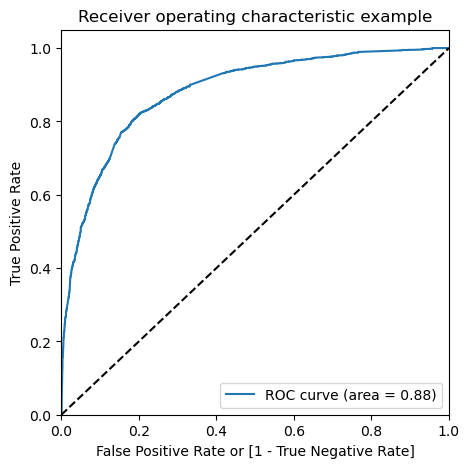

In [128]:
# Draw ROC
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Conversion_Prob"])

The area under ROC curve is 0.88/1, indicating a fairly good predictive model.

Now we will create a table showing probability values of different cutoffs

In [129]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.411204,0,1,1,1,1,1,0,0,0,0,0
1,0,0.068997,0,1,0,0,0,0,0,0,0,0,0
2,0,0.275439,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768624,1,1,1,1,1,1,1,1,1,0,0
4,0,0.192718,0,1,1,0,0,0,0,0,0,0,0


In [130]:
# Calculating accuracy, sensitivity, and specificity for different cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] =[i, accuracy, sensitivity, specificity]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.591064,0.969992,0.357571
0.2,0.2,0.755720,0.896188,0.669165
0.3,0.3,0.794372,0.836577,0.768366
0.4,0.4,0.814780,0.773723,0.840080
0.5,0.5,0.807978,0.669505,0.893303
0.6,0.6,0.797774,0.594891,0.922789
0.7,0.7,0.783086,0.516626,0.947276
0.8,0.8,0.757885,0.414031,0.969765
0.9,0.9,0.709493,0.253447,0.990505


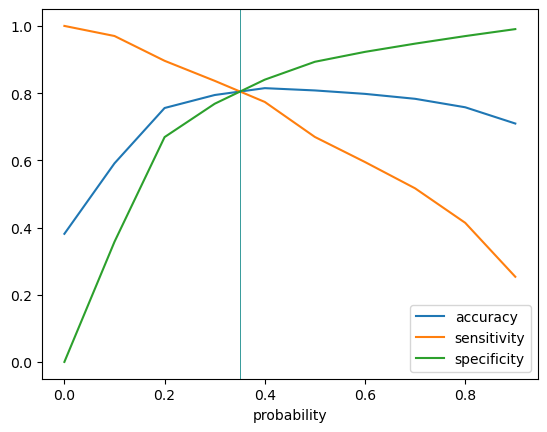

In [131]:
# Plotting the graph to find out optimum cut-off point
ax = cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.axvline(x=0.35, color='teal',linewidth = 0.55, linestyle='-')

From the graph, we can see that the optimum cutoff point is approximately 0.35

We will now recreate the given and predicted values table again with optimum cutoff point

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

# Dropping unecessary columns for better observation:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 

y_train_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.411204,1
1,0,0.068997,0
2,0,0.275439,0
3,0,0.768624,1
4,0,0.192718,0


In [133]:
# Check the overall accuracy again
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8095238095238095


In [134]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])
confusion2

array([[3249,  753],
       [ 479, 1987]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Sensitivity
TP/(TP+FN)

0.8057583130575832

In [137]:
# Specificity
TN/(TN+FP)

0.8118440779610195

In [138]:
# Precision
TP/(TP+FP)

0.7251824817518249

In [139]:
# Recall 
TP/(TP+FN)

0.8057583130575832

With cutoff threshold of 0.35, we have an accuracy of approximately 81%, the sensitivity & specificity rate of 81%. Precision value is at 73% while Recall is 81%

#### Precision - Recall tradeoff

In [140]:
# Creating the precision - recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

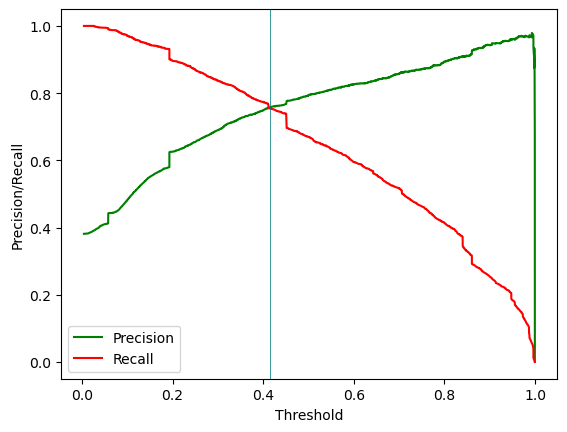

In [141]:
# Plotting the curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

plt.axvline(x=0.415, color='teal',linewidth = 0.55, linestyle='-')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.415 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.411204,0
1,0,0.068997,0
2,0,0.275439,0
3,0,0.768624,1
4,0,0.192718,0


In [143]:
# Confusion matrix
confusion3 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"] )
confusion3

array([[3407,  595],
       [ 605, 1861]], dtype=int64)

In [144]:
# Accuracy
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.8144712430426716

In [145]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [146]:
# Sensitivity
TP/(TP+FN)

0.7546634225466342

In [147]:
# Specificity
TN/(TN+FP)

0.8513243378310844

In [148]:
# Precision
TP/(TP+FP)

0.7577361563517915

In [149]:
# Recall 
TP/(TP+FN)

0.7546634225466342

### Insights:
- With precision-recall cutoff threshold of 0.415, we have an accuracy of approximately 81%, the sensitivity rate of 75%, specificity of 85%. Precision value is at 76% while Recall is 75%.
- Since we want a higher sensitivity/recall rate, we will choose the first threshold (0.35)

## Part VII. Making Prediction on Test Set

In [150]:
# Scaling numerical variables
num_cols = X_test.select_dtypes(include=['int64','float64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [151]:
col = X_train_rfe.columns
col

Index(['TotalVisits', 'Specialization_Others',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Email Bounced',
       'Last Activity_Converted to Lead', 'Lead Source_Welingak Website',
       'Lead Source_Olark Chat', 'Last Activity_SMS Sent',
       'Current Occupation_Working Professional', 'Web Time',
       'Lead Origin_Lead Add Form', 'Lead Origin_Landing Page Submission'],
      dtype='object')

In [152]:
X_test = X_test[col]

In [153]:
# Add constant variables to test data
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.shape

(2772, 14)

In [154]:
# Making prediction with our final model (model3)
y_test_pred = model3.predict(X_test_sm)

In [155]:
y_test_pred.head(10)

4269    0.728893
2376    0.860544
7766    0.822359
9199    0.057481
4359    0.840111
9186    0.513001
1631    0.388134
8963    0.124797
8007    0.052897
5324    0.272581
dtype: float64

In [156]:
# Converting to dataframe
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head(10)

,0
4269,0.728893
2376,0.860544
7766,0.822359
9199,0.057481
4359,0.840111
9186,0.513001
1631,0.388134
8963,0.124797
8007,0.052897
5324,0.272581


In [157]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head(10)

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1
9186,1
1631,1
8963,1
8007,0
5324,1


In [158]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending the two dataframes
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head(10)

,Converted,0
0,1,0.728893
1,1,0.860544
2,1,0.822359
3,0,0.057481
4,1,0.840111
5,1,0.513001
6,1,0.388134
7,1,0.124797
8,0,0.052897
9,1,0.272581


In [160]:
# Renaming column 0
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head(10)

,Converted,Conversion_Prob
0,1,0.728893
1,1,0.860544
2,1,0.822359
3,0,0.057481
4,1,0.840111
5,1,0.513001
6,1,0.388134
7,1,0.124797
8,0,0.052897
9,1,0.272581


In [161]:
# Making prediction using cutoff threshold of 0.43
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.728893,1
1,1,0.860544,1
2,1,0.822359,1
3,0,0.057481,0
4,1,0.840111,1
...,...,...,...
2767,0,0.186865,0
2768,1,0.860544,1
2769,0,0.192718,0
2770,0,0.644932,1


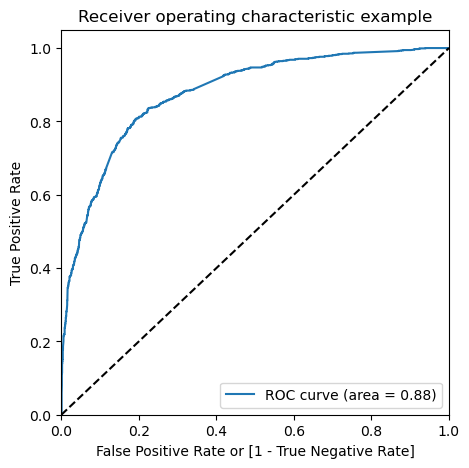

In [162]:
# Drawing ROC
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Conversion_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Conversion_Prob"])

Area under ROC curve is 0.88/1

In [163]:
# Check accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final["final_predicted"])

0.8077200577200577

In [164]:
# Confusion matrix
confusion4 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"] )
confusion4

array([[3407,  595],
       [ 605, 1861]], dtype=int64)

In [165]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [166]:
# Sensitivity
TP/(TP+FN)

0.7546634225466342

In [167]:
# Specificity
TN/(TN+FP)

0.8513243378310844

In [168]:
# Precision
TP/(TP+FP)

0.7577361563517915

In [169]:
# Recall 
TP/(TP+FN)

0.7546634225466342

### Note:
- So with our cutoff at 0.35, we have around 81% of accuracy, 75% sensitivity, 85% specificity. Precision and recall are at 76% and 75% respectively.
- This comes close to X Education's requirement of building a model aiming for the target lead conversion rate of around 80%.

## CONCLUSION

### Top 3 features that contribute to better prediciting hot leads:
**- Web Time**  
**- Lead Origine_Lead Add Form**  
**- Current Occupation_Working Professional**

### Recommendations:
- X Education may want to invest in upgrading their website with new features, more interesting information as those who are attracted to the website have a higher tendency to become students.
- The company may also want to have a marketing strategy focusing on working professionals.
- Increasing budgets for Welingak Website, Olark Chat may help boosting hot leads.
- Spend more on telephone-marketing and sms campaigns.
- The landing page submission as well as email bounced should be improved.